# Introduction to mathematical statistics 7e, hogg

personal workbook with python

## Chapter 3

#### Example 3.1.5

\begin{equation}
f_Y(y) = {F}_Y' (y) = 6 F(y) [1-F(y)] f(y)
\end{equation}

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

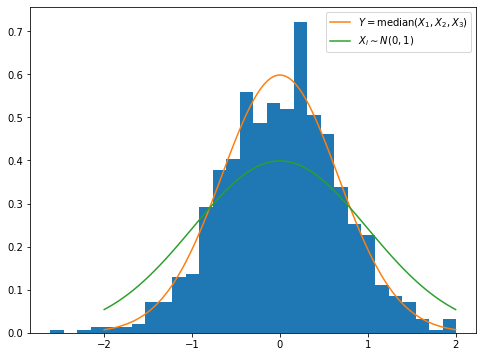

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

n_samples = 1000
s = np.random.normal(0, 1, (n_samples, 3))
y = np.median(s, axis=1)
count, bins, ignored = ax.hist(y, 30, density=True)
y = np.linspace(-2, 2, 100)
f_y = 6 * norm.cdf(y) * (1 - norm.cdf(y)) * norm.pdf(y)
ax.plot(y, f_y, label='$Y = \mathrm{median} (X_1, X_2, X_3)$')
ax.plot(y, norm.pdf(y), label='$X_i \sim N(0, 1)$')
ax.legend()

### Exercise 3.1.21

In [1]:
from sympy import *

x1, x2 = symbols('x1, x2')

In [2]:
Sum(Sum(x2 * binomial(x1, x2) * Rational(1, 2)**x1 * x1 / 15, [x2, 0, x1]), [x1, 1, 5]).doit()

11/6

In [14]:
Sum(Sum(x1/2 * binomial(x1, x2) * Rational(1, 2)**x1 * x1 / 15, [x2, 0, x1]), [x1, 1, 5]).doit()

11/6

### Exercise 3.1.22

In [2]:
from sympy import *

x, y = symbols('x, y')

In [3]:
px = Rational(1, 36)
py = Rational(15, 36)
p3 = 1 - px - py

In [18]:
# it takes forever
# Sum(
#     Sum(6 * x * y * factorial(10)/factorial(x)/factorial(y)/factorial(10 - x - y) * px**x * py**y * p3**(10 - x - y),
#         [y, 0, 10 - x]),
#     [x, 0, 10]).doit()

In [8]:
f = Sum(6 * x * y * factorial(10)/factorial(x)/factorial(y)/factorial(10 - x - y) * px**x * py**y * p3**(10 - x - y),
        [y, 0, 10 - x])

In [15]:
from functools import reduce

ans = reduce(lambda a, x: a + x, [f.subs({x: el}).doit() for el in range(10)])

In [16]:
ans

25/4

In [17]:
# using moment generating function
10 * 9 * px * py * 6

25/4

### Exercise 3.1.27

In [8]:
import numpy as np
from scipy.stats import binom, hypergeom

In [10]:
rv = hypergeom(1000, 50, 10)
1 - (rv.pmf(0) + rv.pmf(1))

0.08530757377364506

In [6]:
1 - (binom.pmf(0, 10, 0.05) + binom.pmf(1, 10, 0.05))

0.08613835589931607

In [11]:
rv = hypergeom(1000, 100, 10)
1 - (rv.pmf(0) + rv.pmf(1))

0.26370335727056493

In [7]:
1 - (binom.pmf(0, 10, 0.1) + binom.pmf(1, 10, 0.1))

0.2639010708999996

### Exercise 3.2.10

In [1]:
import numpy as np
from scipy.special import factorial

In [2]:
x = np.arange(1, 10)
m = 3

x[np.exp(-m) * m**x / factorial(x) < 0.01]

array([8, 9])

### Exercise 3.2.11

In [7]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

m = np.sqrt(6)
x = np.arange(0, 10)
rv = poisson(m)
pmf = rv.pmf(x)

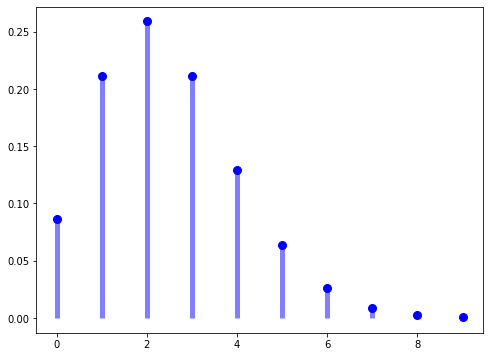

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(x, pmf, 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)

### Exercise 3.2.13

In [9]:
from sympy import *

In [10]:
t1, t2 = symbols('t1, t2')

M = exp(-2) * exp((1 + exp(t1)) * exp(t2))
M

exp(-2)*exp((exp(t1) + 1)*exp(t2))

In [17]:
mu_x = diff(M, [t1, 1]).subs({t1: 0, t2:0})
mu_x

1

In [18]:
mu_y = diff(M, [t2, 1]).subs({t1: 0, t2:0})
mu_y

2

In [19]:
var_x = diff(M, [t1, 2]).subs({t1: 0, t2:0})
var_y = diff(M, [t2, 2]).subs({t1: 0, t2:0})
var_x, var_y

(2, 6)

In [22]:
cov_xy = diff(diff(M, [t1, 1]), [t2, 1]).subs({t1: 0, t2:0}) - mu_x * mu_y
cov_xy

1

### Exercise 3.4.4

In [1]:
from sympy import *
from scipy.stats import norm

In [5]:
rv = norm()
z = rv.ppf([0.9, 0.95])  # inverse cdf
z

array([1.28155157, 1.64485363])

In [6]:
mu, sigma = symbols('mu, sigma')

In [8]:
f1 = (89 - mu) / sigma - z[0]
f2 = (94 - mu) / sigma - z[1]
res = solve([f1, f2], [mu, sigma])
res

{mu: 71.3624512260975, sigma: 13.7626524348300}

In [11]:
res[sigma] ** 2

189.410602041931